In [ ]:
from IPython.core.display import HTML
from IPython.display import Image
from IPython.display import display, Math
from IPython.display import display as disp

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# *Circuitos Elétricos I - Semana 6*

### Problema 1
  
Para o circuito abaixo, tem-se que $v(t)=-1800te^{-20t}$ para $t\geq0$ e $i_1(0)=4\;A$ e $i_2(0)=-16\;A$

a) Determine $i_1(t)$ e $i_2(t)$ para $t\geq0$.\
b) Determine a energia fornecida à fonte de tensão no intervalo $0\leq t \leq\infty$.\
c) Determine a energia inicial armazenada nos indutores.\
d) Determine a energia final armazenada nos indutores.

In [ ]:
Image("./figures/J8C1.png", width=500)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

tmax = 1
t = np.linspace(0, tmax, num = 1000)
v = -1800*t*np.exp(-20*t)

plt.plot(t, v)
plt.xlim(0, tmax)
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('v(t) [V]')
plt.show()

In [ ]:
# valores das indutâncias
L1 = 10
L2 = 30

# valores iniciais das correntes
i1_0 = 4
i2_0 = -16

In [ ]:
from sympy import *

# define as variáveis 
t, τ = symbols('t, τ')

# define v(τ)
v = -1800*τ*exp(-20*τ)

# correntes nos indutores em função da tensão aplicada aos terminais
i1 = -(1/L1)*integrate(v, (τ, 0, t)) + i1_0
i2 = -(1/L2)*integrate(v, (τ, 0, t)) + i2_0

print('Correntes nos indutores:')
print('i1(t) = ', i1 , ' A')
print('i2(t) = ', i2 , ' A')

In [ ]:
# LKC
i = i1 + i2

# define v(t)
v = -1800*t*exp(-20*t) 

# potência fornecida à fonte
p = v*i

# energia entrege à fonte
E = integrate(p, (t, 0, oo))
print('Energia entrege à fonte:')
print('E = %.2f J' %E)

In [ ]:
i1.simplify()

In [ ]:
# calculando os valores de energia em t=0

E1_0 = (1/2)*L1*(i1.evalf(subs={t:0}))**2
E2_0 = (1/2)*L2*(i2.evalf(subs={t:0}))**2

print('Energia inicial armazenada nos indutores:')
print('E1(0) = %.2f J' %E1_0)
print('E2(0) = %.2f J' %E2_0)

In [ ]:
# calculando os valores de energia em t =oo

E1_inf = (1/2)*L1*(i1.evalf(subs={t:100}))**2
E2_inf = (1/2)*L2*(i2.evalf(subs={t:100}))**2

print('Energia final armazenada nos indutores:')
print('E1(oo) = %.2f J' %E1_inf)
print('E2(oo) = %.2f J' %E2_inf)

In [ ]:
# calculando a variação de energia nos indutores

ΔE = (E1_inf-E1_0) + (E2_inf-E2_0)

print('Variação da energia armazenada nos indutores:')
print('ΔE = %.2f J' %ΔE)

### Problema 2

Cálculo de indutâncias equivalentes com acoplamento magnético

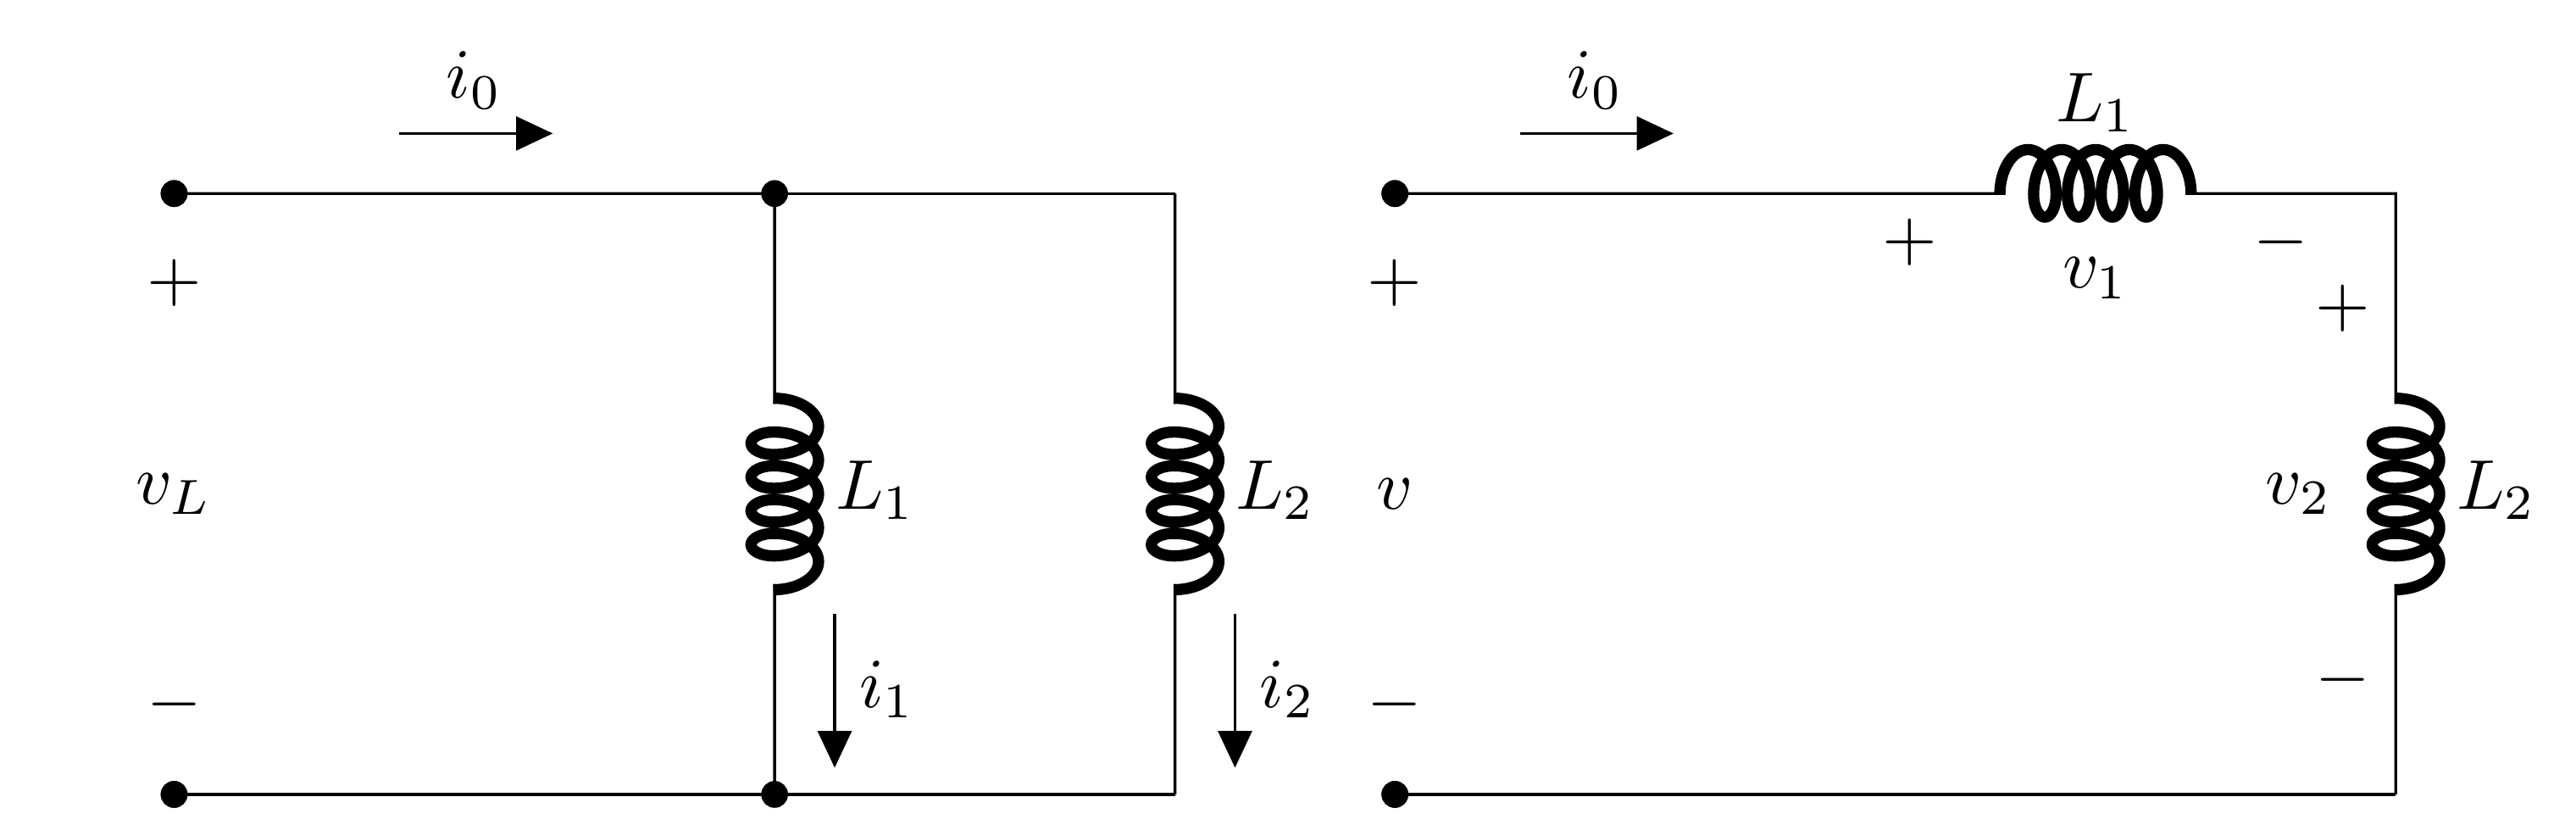

In [40]:
Image("./figures/J8C2.png", width=700)

$$
\begin{aligned}
&v_L = L_{1} \frac{d i_{1}}{d t}+M \frac{d i_{2}}{d t}\\
&v_L = L_{2} \frac{d i_{2}}{d t}+M \frac{d i_{1}}{d t}
\end{aligned}
$$

In [41]:
L1, L2, M, vL, t = symbols('L_1, L_2, M, v_L, t', real=True)

In [48]:
i1 = Function('i_1')(t)
i2 = Function('i_2')(t)

A  = Matrix([[L1, M],[M, L2]])
V  = Matrix([[vL],[vL]])

I  = Matrix([[i1],[i2]])
dI = diff(I, t)

disp(Math('A = '+latex(A)))
disp(Math('V = '+latex(V)))
disp(Math('dI = '+latex(dI)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [49]:
Eq(V, A*dI)

Eq(Matrix([
[v_L],
[v_L]]), Matrix([
[L_1*Derivative(i_1(t), t) - M*Derivative(i_2(t), t)],
[L_2*Derivative(i_2(t), t) - M*Derivative(i_1(t), t)]]))

In [50]:
# matriz inversa de A

disp(Math(r'A^{-1} = '+latex(A**-1)))

<IPython.core.display.Math object>

In [51]:
# calcula o vetor de derivadas das correntes

dI = (A**-1)*V
dI.simplify()

disp(Math(r'\frac{dI}{dt} = '+latex(dI)))

<IPython.core.display.Math object>

In [52]:
# di0/dt = di1/dt + di2/dt 

dI0 = dI[0] + dI[1]

disp(Math(r'\frac{di_0}{dt} = \frac{di_1}{dt} + \frac{di_2}{dt} =  '+latex(dI0.simplify())))

<IPython.core.display.Math object>

In [53]:
# indutância equivalente: vL = Leq*di0/dt -> Leq = vL/di0/dt
Leq = vL/dI0

disp(Math('L_{eq} = '+latex(Leq.simplify())))

<IPython.core.display.Math object>